# **PREDICTION OF STROKE BY USING VARIOUS ML ALGORITHUMS**

## FLOW OF THE ANALYSIS
1)Importing necessary libraries:

numpy, pandas, matplotlib, seaborn, sklearn,warnnings,...

2)Import file-csv,excel

3)Exploratory Data Anaysis

    -Check, head, tail, info , shape, describe(statistical information), 
    -duplicates- remove duplpicates,
    -null/missing values - treat them - continuos(mean/median), caterorical(mode)
    -Outliers detection - analysis using IQR, Z-score.. & removing or replacing them mode or median
    - drop un-necessry columns like S.No,..
    
4)Data Visualization

    -box plot, histogram, scatterplot, countplot, heatmap, barplot, pairpolt, ...
    
5)convert categorical to numerical: one-hot encoding Label Encoding, dummification

6)Feature Engineerinng: feature transformation/ normalisation/ Min-Max scalar, Standederd scaler, SMOTE analysis

7)Split the data for the model evaluation: tarining & testing data(70-30 or 80-20)

8)Build the model using the training data

9)predict the results using testing data

10)Model evaluation:

    Reggression model: adjusted R2- higher the R2 -better the model
    
    classification model: (Logistic Regression, Decission tree, KNN, Navie Bayes, SVM,..)
    
    confusion matric- Accuracy,precision, recall, sensitivity, f1-score, AUC-ROC curve,

# Journals


1)A predictive analytics approach for stroke prediction using machine learning and neural networks(Elsevier) :  DT, RF, NN, CNN, SVM, LASSO, Electric net

2)Prediction of Stroke Using Machine Learning(Research gate) : DT, Navie Bayes, ANN

3)Analyzing the Performance of Stroke Prediction using ML Classification Algorithms(IJACSA): Logistic Regression, DT, RF, Navie Bayes, SVM, KNN

4)BrainOK: Brain Stroke Prediction using Machine Learning(JETIR) :DT, Logistic regression, KNN, SVM, RF

5)STROKE PREDICTION USING MACHINE LEARNING(IJCRT): Python-Logistic Regression

## Attribute Information

1) id: id of the patient

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## IMPORTING THE LIBRARIES

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing the dataset

In [2]:
#to load the data
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
dff=df.copy()#creating a duplicate copy to have the original data

### Viewing what is in the data

In [3]:
df.head() # to get the top 5 rows of the data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail() # to get the bottom 5 rows of the data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
#to find the number of rows & columns of the data
df.shape

(5110, 12)

In [6]:
#Returns dimension of dataframe
df.ndim

2

In [7]:
#to get the non-null vlaues, type of data, memory allocated, number of columns & rows,
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### To get the statistical information of the data

In [8]:
#to get the statistical information of the data (we get infromation for numeric data)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
#to get the Statistical informantion for categorical values also
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


### To find the data types in the data

In [10]:
# To know the Datatypes of each column
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
#To get the count of the data types in the data
df.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

### Duplicate Values

In [12]:
#Find the duplicates in the entire data
df.duplicated().sum()

0

There are no duplicate vaues in the given data set.


#### If there are duplicates
If there are dupicate values then we must  remove the duplicate entities.

df.drop_duplicates(inplace=True)

To remove the duplicates permanently we must use inplace=True

### Unique values 

In [13]:
#Gives the count(or the number) of unique entries/ values present in each columns
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [14]:
# Find unique values of a particular column in the data
print(df['gender'].unique()) #or
print(df.gender.unique())

['Male' 'Female' 'Other']
['Male' 'Female' 'Other']


### Dropping or removing the un-necessary data columns

In [15]:
#to drop or remove the particular or unnecessary columns in the data
df.drop(['id'], axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### NULL VALUES
if there are null/empty values then -- treat them with

    1.continuous variable:--- mean,median
        if there are outliers present in the data mean is effected, median is not effected.
    2.categorical variable: -- mode

In [16]:
#to find the sum of null values present in each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [17]:
#finding the median of the 'bmi' column which has the null values to replace it by median
print("Median of 'bmi' is: " ,df['bmi'].median())

Median of 'bmi' is:  28.1


In [18]:
#as bmi column is numerical replacing it with median
df['bmi'].fillna(28.1,inplace=True)

In [19]:
df.isnull().sum()
#checking weather null values are removed or not

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## OUTLIERS ANALYSIS

Outliers are extreme values that differ from most other data points in a dataset. They can be extremely high or low values that are considered as an outliers. They can have a big impact on your statistical analyses.

### Anamoly detection: Trimming (removing outliers) and Capping (imputing outliers).

imputing outliers: outliers are removed or replaced the outliers with estimates based on the remaining data.

### Box plot (or) Box-and-whisker plot

Box plot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

A boxplot is a standardized way of displaying the dataset based on the five-number summary: 
the minimum, the maximum, the sample median, and the first and third quartiles.

Minimum (Q0 or 0th percentile): the lowest data point in the data set excluding any outliers.

Maximum (Q4 or 100th percentile): the highest data point in the data set excluding any outliers.

Median (Q2 or 50th percentile): the middle value in the data set.

First quartile (Q1 or 25th percentile or lower quantile):  qn(0.25), it is the median of the lower half of the dataset.

Third quartile (Q3 or 75th percentile or upper quantile): qn(0.75), it is the median of the upper half of the dataset.

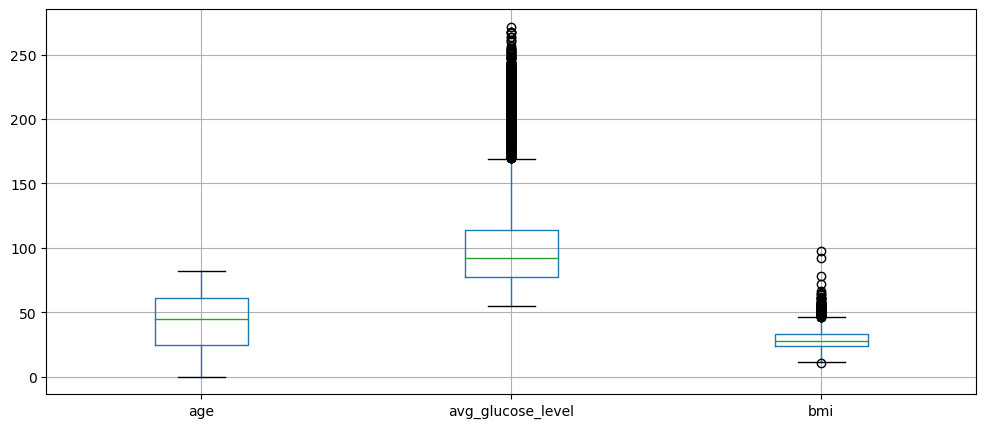

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
df.boxplot(column=[ 'age',  'avg_glucose_level', 'bmi']) #for only numerical columns plot is drawn
plt.show()

**There are outliers present in the "avg_glucose_level" & "bmi" columns of the given dataset.**

These can be treated by using one of the method called as the **IQR(Inter Quantile Range) method.**

### IQR(Inter Quartile Range)

IQR is a measure of statistical dispersion, which is the spread of the data.

The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. 

It is defined as the difference between the 75th and 25th percentiles of the data.

IQR = Q3 − Q1

lower_range =  Q1 - 1.5 * IQR

upper_range = Q3 + 1.5 * IQR 

**Outliers** here are defined as observations that fall below (Q1 − 1.5*IQR) or above (Q3 + 1.5*IQR). 

**Treating the outliers with IQR method.**

In [21]:
#finding the IQR, lower & Upper range of the "avg_glucose_level" & "bmi" columns.
def cal_IQR(x):
    q3,q1 = np.percentile(x, [75 ,25])
    IQR=q3-q1
    lower_range = q1 - 1.5 * IQR
    upper_range = q3 + 1.5 * IQR
    return ("IQR",IQR, "Lower_limit",lower_range, "Upper_limit",upper_range)
#calculate IQR for all columns
result = df[['avg_glucose_level',"bmi"]].apply(cal_IQR)
print(result)

  avg_glucose_level          bmi
0               IQR          IQR
1            36.845          9.0
2       Lower_limit  Lower_limit
3           21.9775         10.3
4       Upper_limit  Upper_limit
5          169.3575         46.3


In [22]:
#removing the rows which are having more than upper range & less than the upper range obtained from the IQR method
df.drop(df[ (df.avg_glucose_level > 169.3575) | (df.avg_glucose_level < 21.9775)].index , inplace=True)
df.drop(df[ (df.bmi > 46.3) | (df.bmi < 10.3)].index , inplace=True)

In [23]:
df.shape,dff.shape

((4393, 11), (5110, 12))

From the shape we can see that the some rows has been removed i,e after the outliers analysis.

# DATA VISUALIZATION

## Count plot

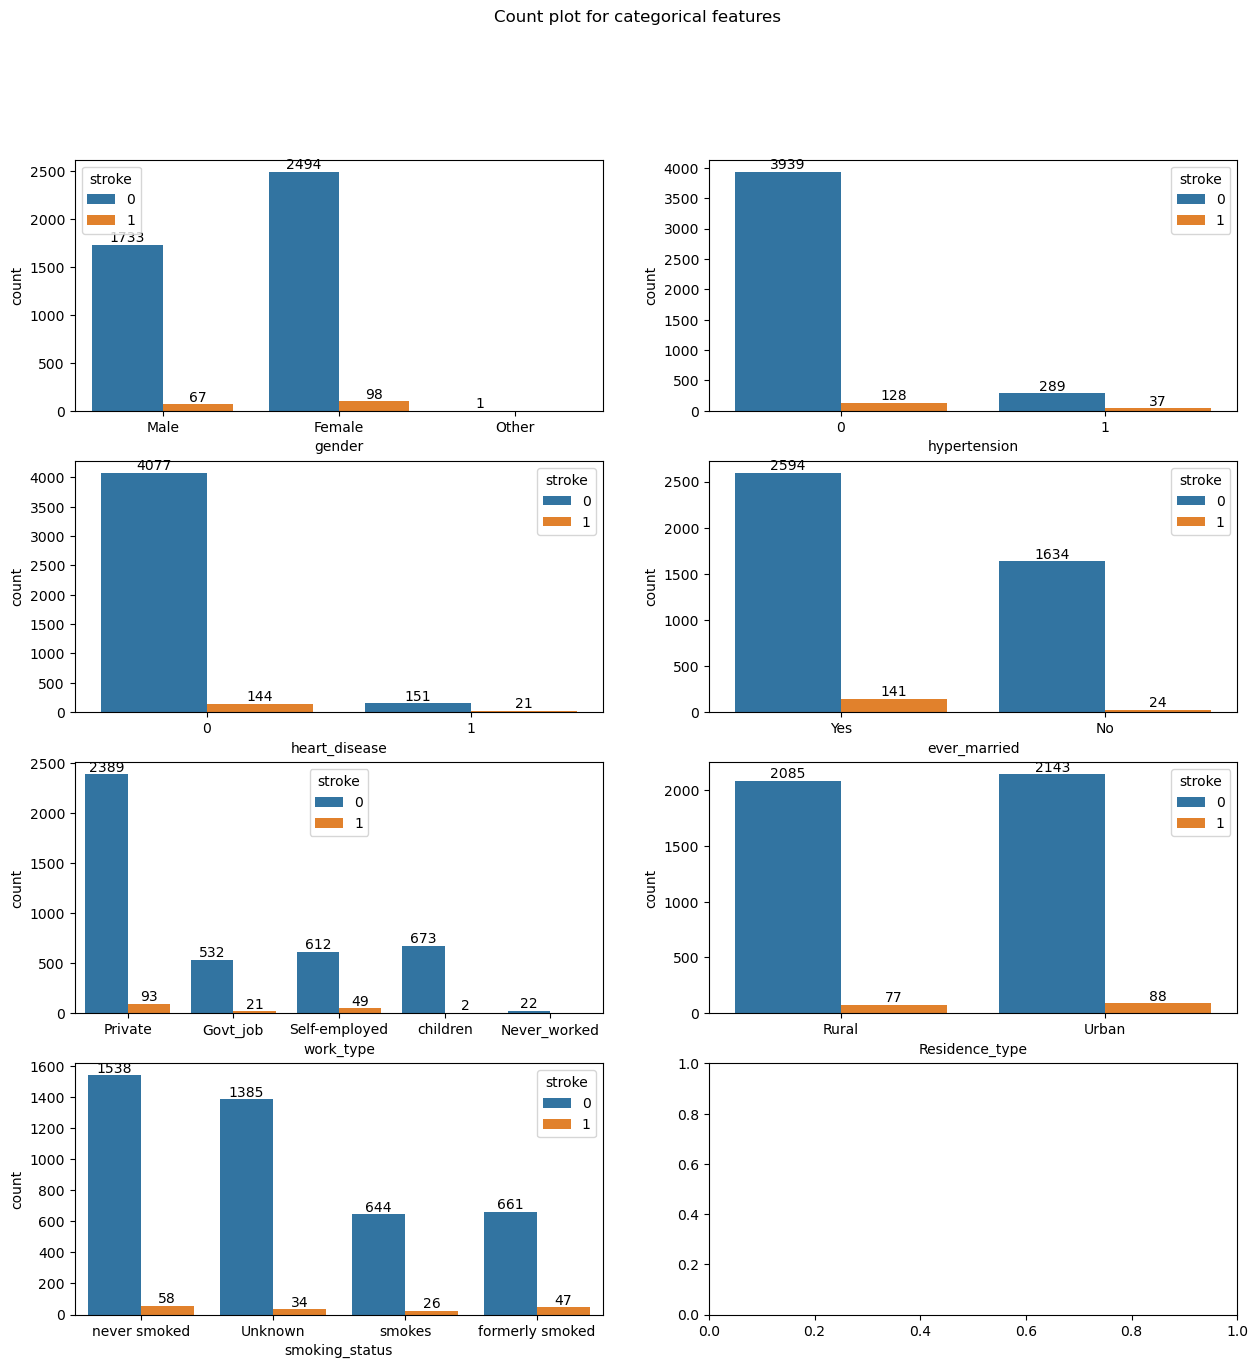

In [24]:
fig,axes = plt.subplots(4,2,figsize = (15,15))
fig.suptitle("Count plot for categorical features")
#gender
ax=sns.countplot(ax=axes[0,0],data=df,x='gender',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)
#hypertension
ax=sns.countplot(ax=axes[0,1],data=df,x='hypertension',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)
#heart_disease
ax=sns.countplot(ax=axes[1,0],data=df,x='heart_disease',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)
#ever_married
ax=sns.countplot(ax=axes[1,1],data=df,x='ever_married',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)
#work_type
ax=sns.countplot(ax=axes[2,0],data=df,x='work_type',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)
#Residence_type
ax=sns.countplot(ax=axes[2,1],data=df,x='Residence_type',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)
#smoking_status
ax=sns.countplot(ax=axes[3,0],data=df,x='smoking_status',hue='stroke')
for label in ax.containers:
    ax.bar_label(label)


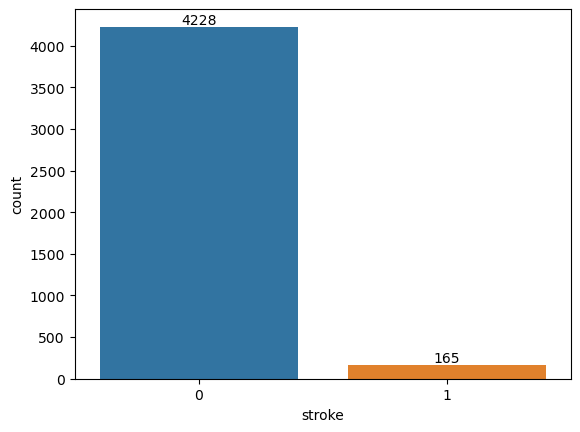

In [25]:
#stroke   
ax=sns.countplot(data=df,x='stroke')
for label in ax.containers:
    ax.bar_label(label)  
plt.show()

## Correlation plot

**correlation matrix**

1)The correlation matrix is a square matrix which represents the correlation coefficient between two variables.

2)all the diagonal elements are equal to 1, since they represent the correlation of variable with itself.

3)if correlation value is closer to

    i) 0: then no/absecne of relation between two variables

    ii) 1:strong positive correlation(one varaiable increases other increases)

    iii)-1:strong negative correlation(if any one varaiable increases other decreases)

4) the darker shades of colour indicates smaller value(less correlation) and the lighter shades indicates the larger/highest value(hih correlation).

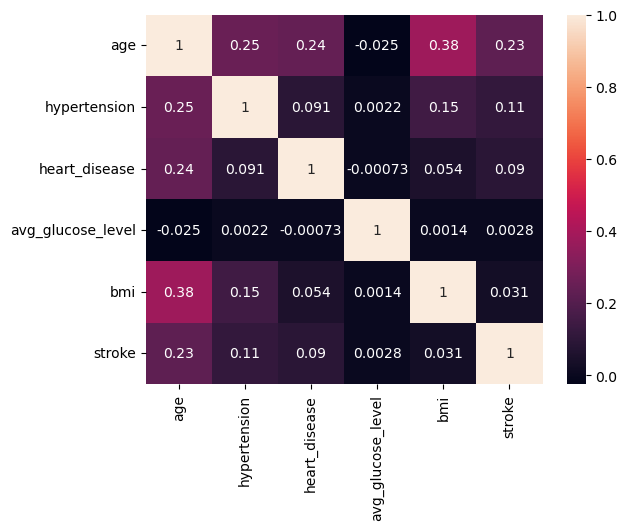

In [26]:

sns.heatmap(df.corr(),annot=True)
plt.show()

In [27]:
#to get the correlation matrix
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.252173,0.239653,-0.025076,0.375466,0.226984
hypertension,0.252173,1.000000,0.090609,0.002156,0.147362,0.113078
heart_disease,0.239653,0.090609,1.000000,-0.000729,0.053986,0.089750
avg_glucose_level,-0.025076,0.002156,-0.000729,1.000000,0.001355,0.002818
bmi,0.375466,0.147362,0.053986,0.001355,1.000000,0.030668
stroke,0.226984,0.113078,0.089750,0.002818,0.030668,1.000000


From the above correlation matrix & plot we can say that the relation order of hierarcy is as follows 

**age > hyper_tension > heat_disease > bmi  > avg_glucose_level**

## Pair Plot

To plot multiple pairwise bivariate distributions in a dataset, you can use the .pairplot() function

The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column

The simplest invocation uses scatterplot() for each pairing of the variables and histplot() for the marginal plots along the diagonal:

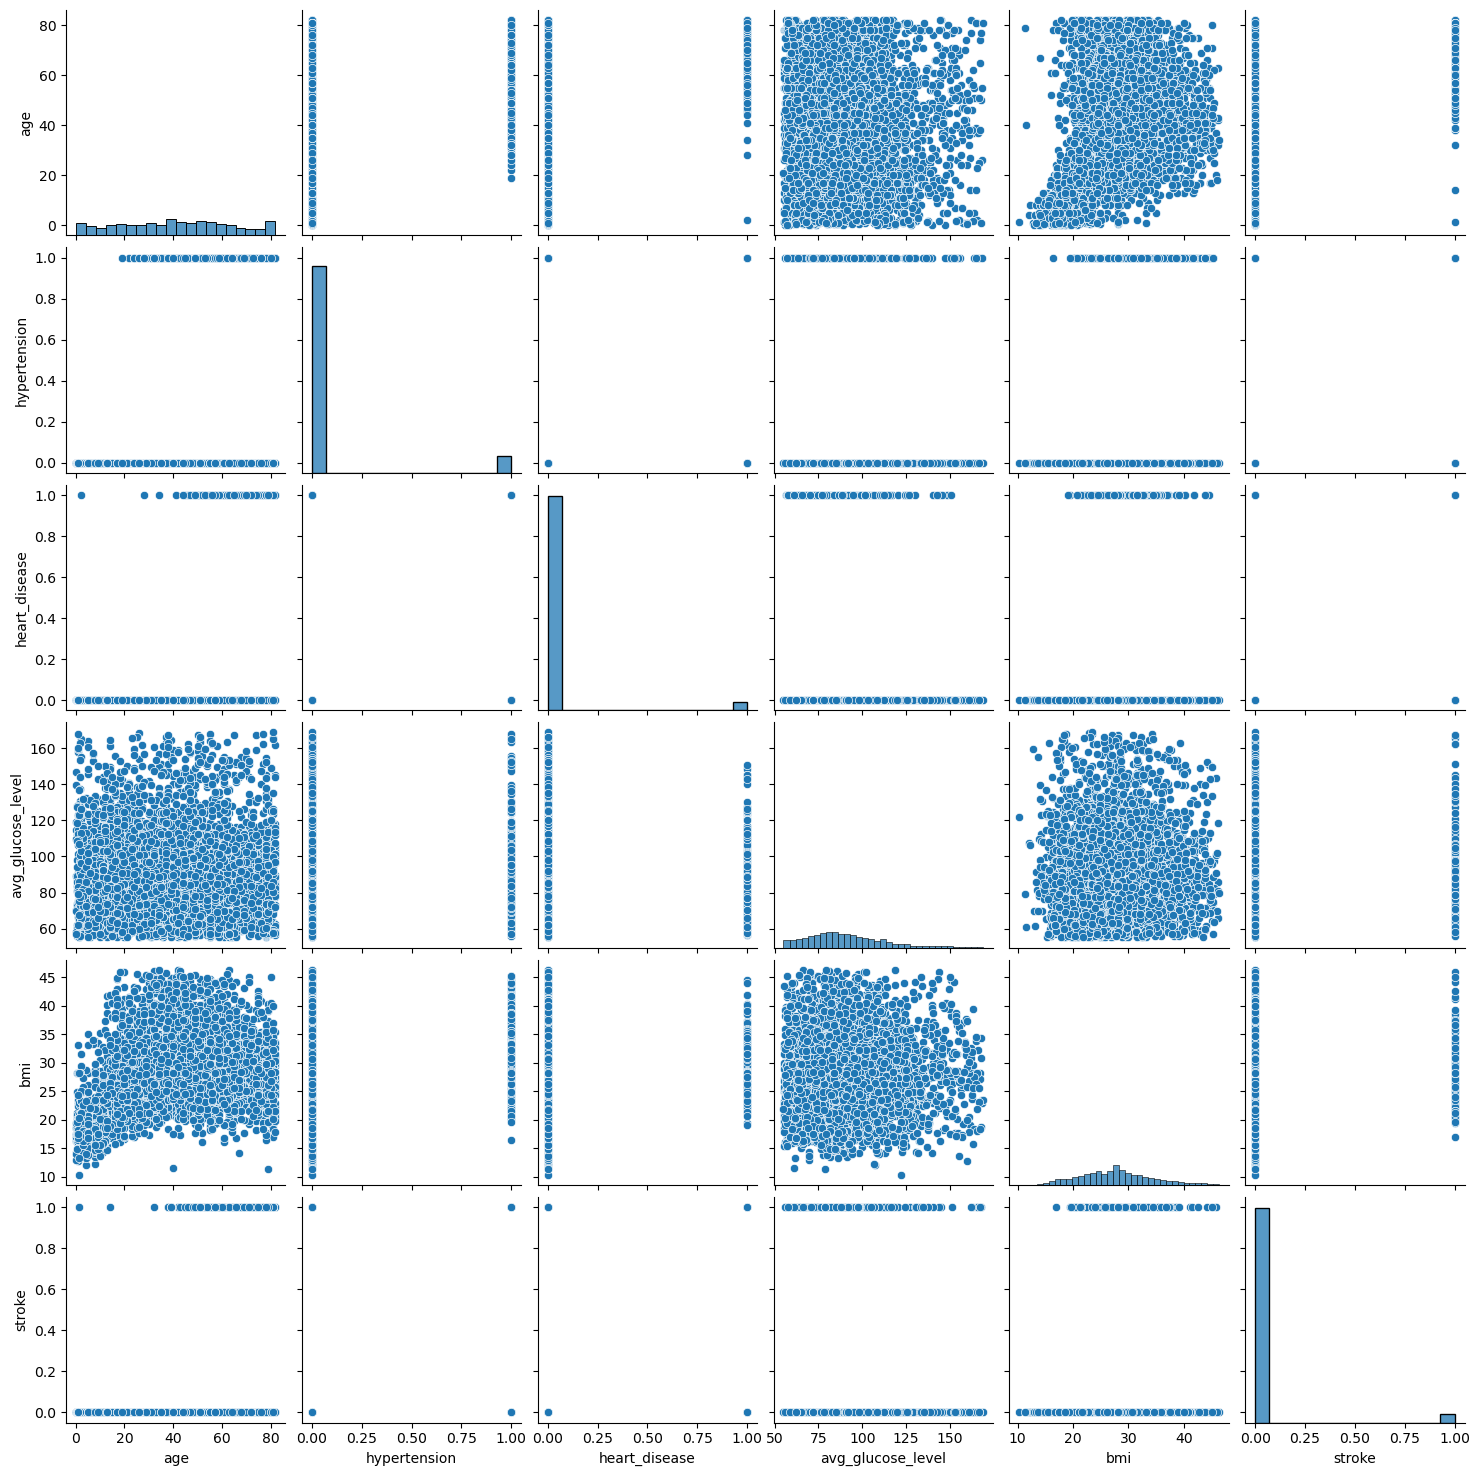

In [28]:
sns.pairplot(df)

## FEATURE ENGINEERING

### ENCODING

In [29]:
# Classifying data into numerical and categorical variables.
numerical_data=df[['age','avg_glucose_level','bmi']]
categorical_data=df[['gender', 'ever_married','work_type', 'Residence_type','smoking_status',]]

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_data:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
6,1,74.0,1,1,1,2,0,70.09,27.4,2,1
7,0,69.0,0,0,0,2,1,94.39,22.8,2,1
8,0,59.0,0,0,1,2,0,76.15,28.1,0,1
9,0,78.0,0,0,1,2,1,58.57,24.2,0,1


In [31]:
df["gender"].unique()
#cheking the encoded values.

array([1, 0, 2])

### checking weather the data is balanced or not

In [32]:
 df["stroke"].value_counts()

0    4228
1     165
Name: stroke, dtype: int64

The data is imbalanced data. so there is a need to balance the data.

The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. 

### SMOTE (Synthetic Minority Oversampling Technique)
it is a machine learning technique that is used for the imbalanced data set.

it is a powerful solution for imbalanced data in classification problems.

#### UnderSampling technique
-The most straightforward method to counteract class imbalance is undersampling.

-Undersampling means that you discard a number of data points of the class that is present too often. 

-The disadvantage that we need to delete a large amount of data.

#### Over-sampling technique
-Oversampling is the opposite of undersampling.

-Oversampling means making duplicates of the data that is the least present in your data set.

-Then add those duplicates to your data set. 

-There will be no information loss but  introducing false information into your model.

#### Data Augmentation
-Data Augmentation is a method that works much like oversampling.

-Rather than making exact duplicates of observations in the less/least present class, you will add small changes to the data points & to generate new data points.

-SMOTE uses this technique.

-Data augmentation is useful to improve the performance and outcomes of machine learning models by forming new and different examples to train datasets.

# Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
x=df.drop(['stroke'],axis=1)
y=df.stroke

### SMOTE analysis

We can clearly see that there is a class imbalance problem here as there are 4860 cases of stroke but only 249 cases of no-stroke. We’ll use SMOTE to handle this class imbalance. 

Synthetic Minority Oversampling Technique (SMOTE) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

1)Choose a minority class as the input vector
2)Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3)Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4)Repeat the steps until data is balanced

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
x_data,y_data=s.fit_resample(x,y)

In [36]:
#we can see that the datavalues has been increased
x_data.shape,y_data.shape,df.shape

((8456, 10), (8456,), (4393, 11))

In [37]:
#we can see that the data has been balanced
y_data.value_counts()

1    4228
0    4228
Name: stroke, dtype: int64

# Feature Scaling or Standardization: 

It is applied to independent variables or features of data which helps to normalize the data within a particular range.

Normalization should be performed when the scale of a feature are misleading or wide .

Scaling helps to weigh all the features equally.

It helps in speeding up the calculations in an algorithm.

In standerd scaler:  mean is 0 and standerd deviation is 1

**x_scaled=x-mean/std.dev**

Standardization replaces the values with their Z scores. 

Standardization is another scaling method where the values are centered around the mean with a unit standard deviation.

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x_data)

## Splitting the Dataset

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_data,test_size=0.3, random_state=33)

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error
import math

# Model Building

## LogisticRegression

Logistic regression estimates the probability of an event occurring based on a given dataset of independent variables.

Since the outcome is a probability, the dependent variable is bounded between **0 and 1**. 

In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds, 

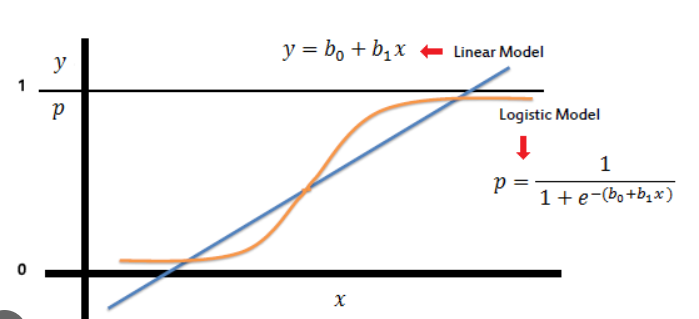

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train) #building training model
y_pred_lor=lr.predict(x_test) #
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_lor)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for Logistic Regression is ',metrics.accuracy_score(y_pred_lor,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_lor))


 CONFUSION MATRIX:
  [[1030  250]
 [ 209 1048]] 

The accuracy for Logistic Regression is  81.90776507686243

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1280
           1       0.81      0.83      0.82      1257

    accuracy                           0.82      2537
   macro avg       0.82      0.82      0.82      2537
weighted avg       0.82      0.82      0.82      2537



## RandomForestClassifier

A random forest is an estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

The sub-sample size is controlled with the max_samples parameter , otherwise the whole dataset is used to build each tree.

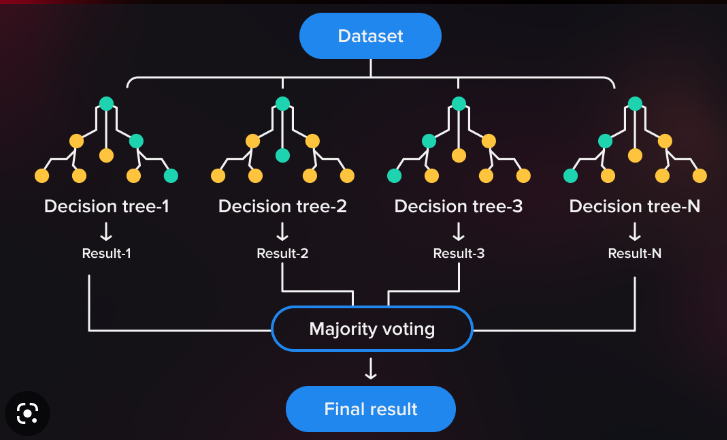

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier( max_depth= 9, max_features= 1, min_samples_leaf= 3, min_samples_split= 5,
                           n_estimators= 300, random_state=33)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_rf)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for RandomForestClassifier is ',metrics.accuracy_score(y_pred_rf,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_rf))


 CONFUSION MATRIX:
  [[1086  194]
 [  74 1183]] 

The accuracy for RandomForestClassifier is  89.43634213638155

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89      1280
           1       0.86      0.94      0.90      1257

    accuracy                           0.89      2537
   macro avg       0.90      0.89      0.89      2537
weighted avg       0.90      0.89      0.89      2537



##  KNeighborsClassifier
KNN it uses the entire dataset as a training set.

It is called as a ‘Lazy Algorithm’ because it learns during the testing phase.

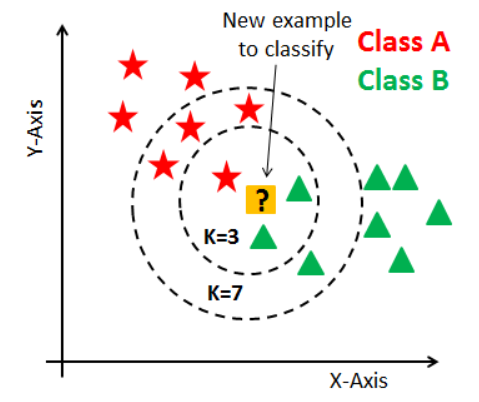

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_knn)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for KNeighborsClassifier is ',metrics.accuracy_score(y_pred_knn,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_knn))


 CONFUSION MATRIX:
  [[1088  192]
 [  34 1223]] 

The accuracy for KNeighborsClassifier is  91.09184075679937

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      1280
           1       0.86      0.97      0.92      1257

    accuracy                           0.91      2537
   macro avg       0.92      0.91      0.91      2537
weighted avg       0.92      0.91      0.91      2537



## Navie Bayes

Naive Bayes classifier assumes that the features we use to predict the target are independent and do not affect each other (but in general there will be a effect).

The word navie means lack of experience.

It will caluclate the probability of an event will occur given another event has already occured.

Bayes Therom is used to find the probability of the hypothesis with the given evidence.

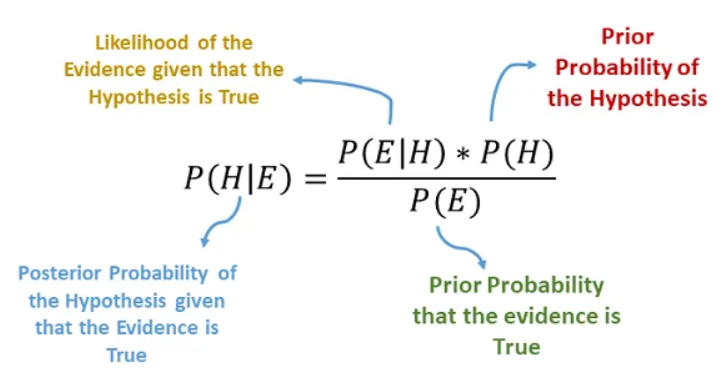

In [44]:
from sklearn.naive_bayes import GaussianNB
na=GaussianNB()
na.fit(x_train,y_train)
y_pred_na=na.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_na)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for KNeighborsClassifier is ',metrics.accuracy_score(y_pred_na,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_na))


 CONFUSION MATRIX:
  [[ 917  363]
 [ 118 1139]] 

The accuracy for KNeighborsClassifier is  81.04059913283406

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.89      0.72      0.79      1280
           1       0.76      0.91      0.83      1257

    accuracy                           0.81      2537
   macro avg       0.82      0.81      0.81      2537
weighted avg       0.82      0.81      0.81      2537



## Decision Tree
It is called as a ‘Greedy Algorithm’ because it makes the optimal choice at each stage.

It starts from the Root node & branches off to number of solutions.

Leaf / Terminal node is a node where further split is not possible, Here we have the decision (yes/no).

Sub-tree is the Sub-section of a decision tree.
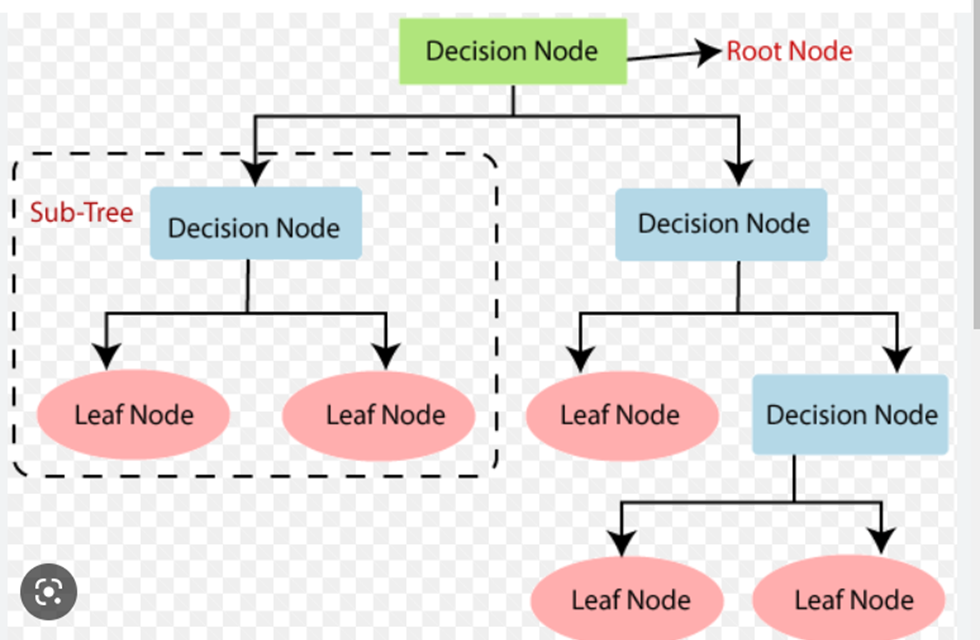


In [45]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt=dt.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_dt)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for KNeighborsClassifier is ',metrics.accuracy_score(y_pred_dt,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_dt))



 CONFUSION MATRIX:
  [[1145  135]
 [  81 1176]] 

The accuracy for KNeighborsClassifier is  91.4860070949941

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91      1280
           1       0.90      0.94      0.92      1257

    accuracy                           0.91      2537
   macro avg       0.92      0.92      0.91      2537
weighted avg       0.92      0.91      0.91      2537



# Support Vector Machine(SVM)
Each data items are plot in n-dimensional space (n :- no. of features).

it is mostly used in classification problems.

SVM classifier is a frontier that best segregates two classes by Hyperplane / line.
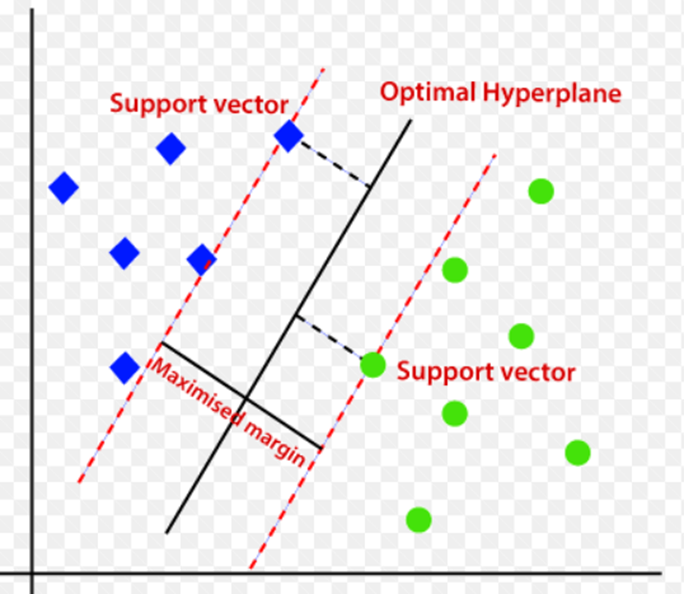

In [46]:
from sklearn.svm import SVC  
svc = SVC(kernel='linear') 
svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)
confusion_matrix=metrics.confusion_matrix(y_test, y_pred_svc)
print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
print('The accuracy for KNeighborsClassifier is ',metrics.accuracy_score(y_pred_svc,y_test)*100)
print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_svc))


 CONFUSION MATRIX:
  [[1032  248]
 [ 206 1051]] 

The accuracy for KNeighborsClassifier is  82.1048482459598

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1280
           1       0.81      0.84      0.82      1257

    accuracy                           0.82      2537
   macro avg       0.82      0.82      0.82      2537
weighted avg       0.82      0.82      0.82      2537



# MODEL EVALUATION

In [47]:
#Final Result Comperison
data = {'Logistic Regression':[metrics.accuracy_score(y_pred_lor,y_test)*100],
    'RandomForestClassifier':[metrics.accuracy_score(y_pred_rf,y_test)*100],
    'KNeighborsClassifier':[metrics.accuracy_score(y_pred_knn,y_test)*100],
    'GaussianNB ':[metrics.accuracy_score(y_pred_na,y_test)*100],
    'DecisionTreeClassifier ': [metrics.accuracy_score(y_pred_dt,y_test)*100],
    'SupportVectorClassifier ': [metrics.accuracy_score(y_pred_svc,y_test)*100]  }

df_result=pd.DataFrame(data,index=["Accuracy"]).T
df_result

,Accuracy
Logistic Regression,81.907765
RandomForestClassifier,89.436342
KNeighborsClassifier,91.091841
GaussianNB,81.040599
DecisionTreeClassifier,91.486007
SupportVectorClassifier,82.104848


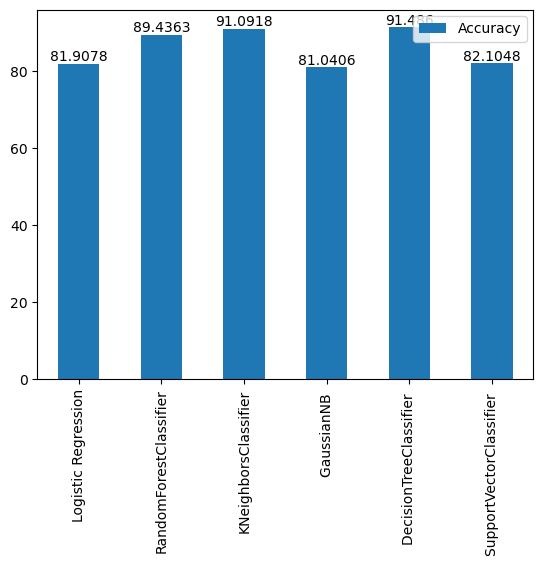

In [48]:
ax = df_result.plot.bar()
for container in ax.containers:
    ax.bar_label(container)

#### The Decision Tree has the highest accuracy after balancing the data

The accuracy for DecisionTreeClassifier is  93.32321699544764


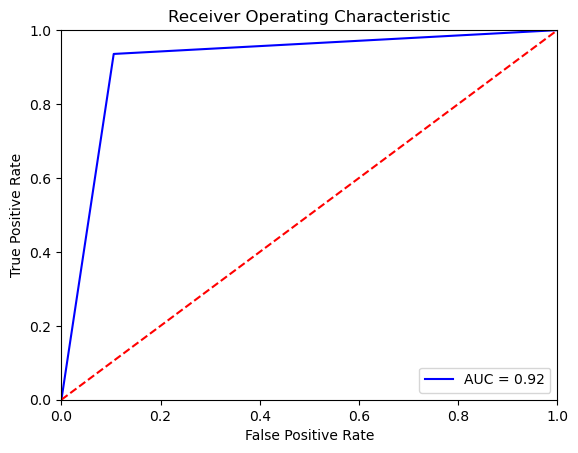

In [49]:
from sklearn.model_selection import train_test_split
x=df.drop(['stroke'],axis=1)
y=df.stroke
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3, random_state=33)
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier(random_state=42)
dtc.fit(x_train1, y_train1)
y_pred_dtc=dtc.predict(x_test1)
print('The accuracy for DecisionTreeClassifier is ',metrics.accuracy_score(y_pred_dtc,y_test1)*100)

#AOC-ROC curve
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### The Decision tree accuracy before baancing the data & after balancing has reduced.

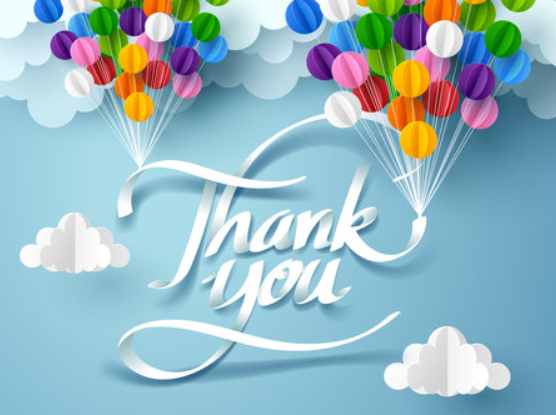

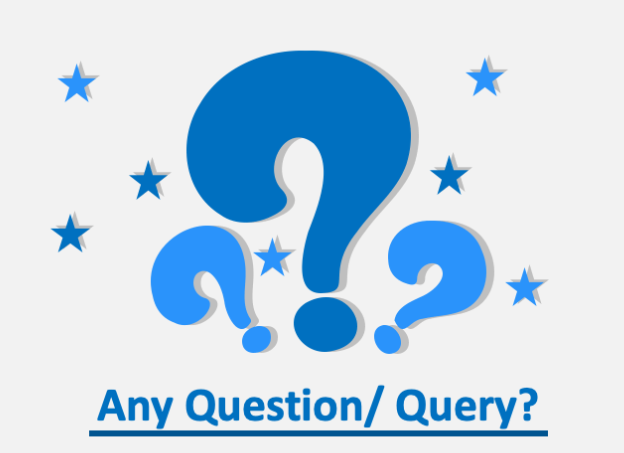